In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
data = {
    'Batch_ID': np.repeat([1, 2], 30),
    'Process': ['A']*30 + ['B']*30,
    'Tensile_Strength': np.concatenate([np.random.normal(50, 5, 30), np.random.normal(53, 5, 30)]),
    'Tear_Strength': np.concatenate([np.random.normal(10, 2, 30), np.random.normal(11, 2, 30)]),
    'Burst_Strength': np.concatenate([np.random.normal(100, 10, 30), np.random.normal(102, 10, 30)])
}

df = pd.DataFrame(data)

print("Sample Data (first 5 rows):")
print(df.head())


Sample Data (first 5 rows):
   Batch_ID Process  Tensile_Strength  Tear_Strength  Burst_Strength
0         1       A         52.483571       9.041652      107.910319
1         1       A         49.308678       9.628682       90.906125
2         1       A         53.238443       7.787330      114.027943
3         1       A         57.615149       7.607587       85.981489
4         1       A         48.829233      11.625052      105.868571


In [ ]:
batchA = df[df['Process']=='A']['Tensile_Strength']
batchB = df[df['Process']=='B']['Tensile_Strength']


In [ ]:
t_stat, p_value = stats.ttest_ind(batchB, batchA, equal_var=False)  # Welch's t-test

print("\nHypothesis Test: Tensile Strength difference between Process B and A")
print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("=> Reject null hypothesis: Significant difference in tensile strength")
else:
    print("=> Fail to reject null hypothesis: No significant difference")


Hypothesis Test: Tensile Strength difference between Process B and A
t-statistic = 2.821, p-value = 0.0065
=> Reject null hypothesis: Significant difference in tensile strength


In [ ]:
conf_level = 0.95
mean_A = np.mean(batchA)
sem_A = stats.sem(batchA)  # standard error of mean
ci_low, ci_high = stats.t.interval(conf_level, len(batchA)-1, loc=mean_A, scale=sem_A)

print(f"\n95% Confidence Interval for Process A Tensile Strength: [{ci_low:.2f}, {ci_high:.2f}]")


95% Confidence Interval for Process A Tensile Strength: [47.38, 50.74]


In [ ]:
summary = df.groupby('Process')[['Tensile_Strength', 'Tear_Strength', 'Burst_Strength']].agg(['mean', 'std', 'count'])
print("\nSummary statistics by Process:")
print(summary)



Summary statistics by Process:
        Tensile_Strength                 Tear_Strength                  \
                    mean       std count          mean       std count   
Process                                                                  
A              49.059266  4.500032    30     10.025770  1.983966    30   
B              52.394188  4.655511    30     10.959497  1.817644    30   

        Burst_Strength                   
                  mean        std count  
Process                                  
A            99.050419  10.241604    30  
B           104.787866   9.473659    30  


In [ ]:


stat, p_var = stats.levene(batchA, batchB)
print(f"\nLevene's test for equal variances (Tensile Strength): stat={stat:.3f}, p-value={p_var:.4f}")

if p_var < 0.05:
    print("=> Variances are significantly different")
else:
    print("=> No significant difference in variances")



Levene's test for equal variances (Tensile Strength): stat=0.245, p-value=0.6223
=> No significant difference in variances


Text(0.5, 1.0, 'Tensile Strength by Process')

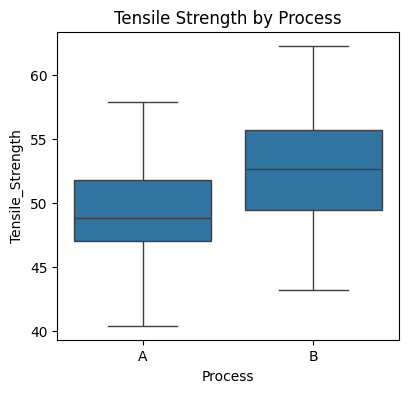

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.boxplot(x='Process', y='Tensile_Strength', data=df)
plt.title('Tensile Strength by Process')


Text(0.5, 1.0, 'Tear Strength by Process')

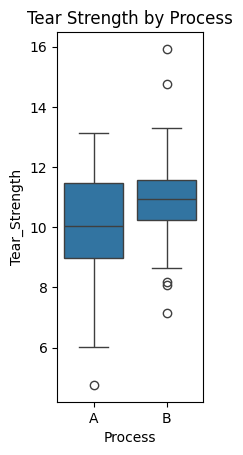

In [ ]:
plt.subplot(1,3,2)
sns.boxplot(x='Process', y='Tear_Strength', data=df)
plt.title('Tear Strength by Process')


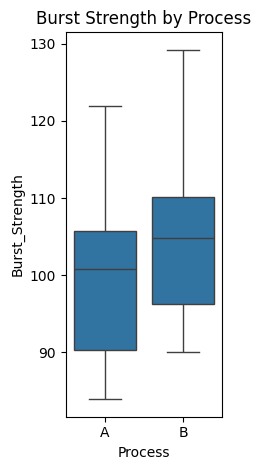

In [ ]:
plt.subplot(1,3,3)
sns.boxplot(x='Process', y='Burst_Strength', data=df)
plt.title('Burst Strength by Process')

plt.tight_layout()
plt.show()


In [ ]:
tear_A = df[df['Process']=='A']['Tear_Strength']
tear_B = df[df['Process']=='B']['Tear_Strength']

t_stat_tear, p_value_tear = stats.ttest_ind(tear_B, tear_A, equal_var=False)
print(f"\nHypothesis Test: Tear Strength difference between Process B and A")
print(f"t-statistic = {t_stat_tear:.3f}, p-value = {p_value_tear:.4f}")


Hypothesis Test: Tear Strength difference between Process B and A
t-statistic = 1.901, p-value = 0.0624


In [ ]:
def conf_int(data, confidence=0.95):
    mean_val = np.mean(data)
    sem_val = stats.sem(data)
    ci_low, ci_high = stats.t.interval(confidence, len(data)-1, loc=mean_val, scale=sem_val)
    return ci_low, ci_high

ci_A_tear = conf_int(tear_A)
ci_B_tear = conf_int(tear_B)

print(f"95% CI for Tear Strength Process A: [{ci_A_tear[0]:.2f}, {ci_A_tear[1]:.2f}]")
print(f"95% CI for Tear Strength Process B: [{ci_B_tear[0]:.2f}, {ci_B_tear[1]:.2f}]")


95% CI for Tear Strength Process A: [9.28, 10.77]
95% CI for Tear Strength Process B: [10.28, 11.64]


In [ ]:
anova_result = stats.f_oneway(batchA, batchB)
print(f"\nANOVA test for Tensile Strength between Processes:")
print(f"F-statistic = {anova_result.statistic:.3f}, p-value = {anova_result.pvalue:.4f}")


ANOVA test for Tensile Strength between Processes:
F-statistic = 7.958, p-value = 0.0065
